# Making Modules ##

## Module functions 

Start by writing a few functions that we can use to create a module.

In [1]:
import numpy as np
#
def circleParams(r):
    '''
    Given the radius of a circle, this function returns its area and circumference.
    '''
    A = np.pi*r**2
    c = 2*np.pi*r
    return A, c
#
def rectangleParams(h, w):
    '''
    Given the height and width of a rectangle, this function returns its area and perimeter.
    '''
    A = h*w
    p = 2*(h + w)
    return A, p
#
def sphereParams(r):
    '''
    Given the radius of a sphere, this function returns its volume and its surface area.
    '''
    V = 4/3*np.pi*r**3
    A = 4*np.pi*r**2
    return V, A
#
def rectPrismParams(h, w, d):
    '''
    Given the height, width and depth of a rectangular prism, this function returns its volume, 
    surface area and total side length.
    '''
    V = h*w*d
    A = 2*(h*w + w*d + h*d)
    s = 4*(h + w + d)
    return V, A, s

We can use these functions in the Notebook in which they are defined. For example, here is a plot of the volume, $V$, and area, $A$, of a sphere as a function of its radius, $r$.

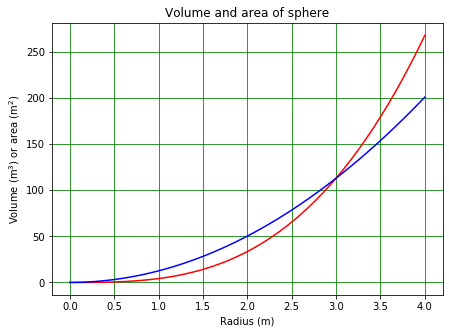

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
nArr = 50
rBot = 0.0
rTop = 4.0
rArr = np.linspace(rBot, rTop, nArr)
Varr, Aarr = sphereParams(rArr)
#
plt.figure(figsize = (7, 5))
plt.title("Volume and area of sphere")
plt.ylabel("Volume (m$^3$) or area (m$^2$)")
plt.xlabel("Radius (m)")
plt.plot(rArr, Varr, linestyle = '-', color = 'r')
plt.plot(rArr, Aarr, linestyle = '-', color = 'b')
plt.grid(color = 'green')
plt.show()

## Creating and using a module

In order to create a module containing routines from this Notebook, click on the *File* menu, then on *Download as* and select *Python*. (If using running Jupyter Lab rather than Jupyter Notebook, use *File*, *Export Notebook As...* and then *Export Notebook to Executable Script*.) Depending on the browser security settings, may get a warning about the file that is created, saying that it can damage your computer. Ignore this and click *Keep* or *Save*. In default download location (usually  *Downloads* folder) will then have file called *Making-Modules.py*. 

Move *Making-Modules.py* into working directory and rename it. Call it *MakingModules.py*. Open *MakingModules.py* by clicking on it in Jupyter. See it is just a copy of this Notebook written as Python code, i.e. all the Markdown cells have been turned into Python comments by sticking a "#" in front of them. Tidy up the file by deleting the superfluous comment lines - leave the ones that are useful! - and other material that isn't part of the functions. Do not delete the line that reads `import numpy as np`!

Can now use all the functions in *MakingModules.py* by importing it as a module, as shown in the following example. (The reason it had to be renamed that hyphens are not allowed in module names in Python, so wouldn't be able to import the file if it was called *Making-Modules.py*.) Note, file name should have extension *.py*, but don't include this in the `import` statement. 

Notice that, after doing `import MakingModules as mm`, we have called the routine `mm.circleParams` (with an `mm.` in front of the name to indicate it comes from the *MakingModules* module, cf. using `np.cos` to use the cosine function from the numpy library). The version of *circleParams* below is therefore that from the *MakingModules* module, not the one defined in this Notebook! 

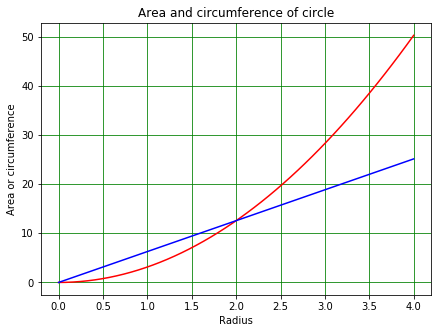

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import MakingModules as mm
#
nArr = 50
rBot = 0.0
rTop = 4.0
rArr = np.linspace(rBot, rTop, nArr)
Aarr, cArr = mm.circleParams(rArr)
#
plt.figure(figsize = (7, 5))
plt.title("Area and circumference of circle")
plt.ylabel("Area or circumference")
plt.xlabel("Radius")
plt.plot(rArr, Aarr, linestyle = '-', color = 'r')
plt.plot(rArr, cArr, linestyle = '-', color = 'b')
plt.grid(color = 'green')
plt.show()

Include the statement `import numpy as np` at the top of *MakingModules.py*. This statement is executed when the module is first loaded, so even if the functions in *MakingModules.py* are used from a program which doesn't import numpy, they will work OK.

## Accessing modules in other folders

The above only allows us to use functions from a module in the directory in which we are working. Modules in other directories acan also be accessed. In order to try this, make a copy of *MakingModules.py* and call it *MakingModulesNew.py*. Make a new folder *MakingModulesLib* in your working directory. Move the file *MakingModulesNew* into the folder *MakingModulesLib*. Now try to run the cell below.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import MakingModulesNew as mmnew
#
nArr = 50
rBot = 0.0
rTop = 4.0
rArr = np.linspace(rBot, rTop, nArr)
Aarr, cArr = mmnew.circleParams(rArr)
#
plt.figure(figsize = (7, 5))
plt.title("Area and circumference of circle")
plt.ylabel("Area or circumference")
plt.xlabel("Radius")
plt.plot(rArr, Aarr, linestyle = '-', color = 'r')
plt.plot(rArr, cArr, linestyle = '-', color = 'b')
plt.grid(color = 'green')
plt.show()

ModuleNotFoundError: No module named 'MakingModulesNew'

Python can't find the *MakingModulesNew* module, because it only looks for it in the current working directory and in directories specified by a system variable called `path`. We can see which directories are in `path` using the `sys.path` command, after we have imported the `sys` module, as follows.

In [7]:
import sys
#
print("Directories in path are:\n",sys.path)

Directories in path are:
 ['C:\\Users\\green\\OneDrive\\OneDocuments\\Liverpool\\Teaching\\Phys105-Comp01-2019\\Phys105-Lectures2019', 'C:\\Users\\green\\Anaconda3\\python37.zip', 'C:\\Users\\green\\Anaconda3\\DLLs', 'C:\\Users\\green\\Anaconda3\\lib', 'C:\\Users\\green\\Anaconda3', '', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\green\\.ipython']


The `path` variable is set up when Anaconda is installed. Exactly what you see will depend on your computer's operating system and where Anaconda was installed. The `path` entries  will always have the structure *top_level/second_level/third_level*, and this is what you will see on a Macintosh or a Linux system. On a Windows computer, the forward slashes (/) will be replaced by back-slashes (\\). These have to be represented by a double back-slash, as the first backslash is treated as an escape character (in both Python and Markdown). 

If we want to temporarily add a new directory to `path`, we can do it using `path.append` from the `sys` module as follows.

In [8]:
sys.path.append('MakingModulesLib')
print("Directories in path are:\n",sys.path)

Directories in path are:
 ['C:\\Users\\green\\OneDrive\\OneDocuments\\Liverpool\\Teaching\\Phys105-Comp01-2019\\Phys105-Lectures2019', 'C:\\Users\\green\\Anaconda3\\python37.zip', 'C:\\Users\\green\\Anaconda3\\DLLs', 'C:\\Users\\green\\Anaconda3\\lib', 'C:\\Users\\green\\Anaconda3', '', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\green\\.ipython', 'MakingModulesLib']


You will see that *MakingModulesLib* has now been added to *path*. Now `import MakingModulesLib as mmlib` will work. 

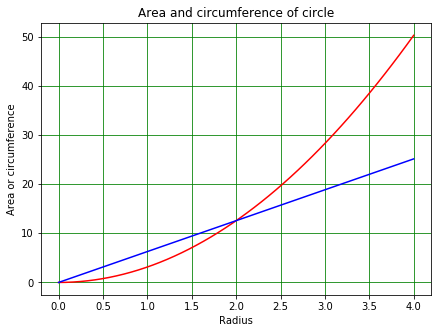

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import MakingModulesNew as mmnew
#
nArr = 50
rBot = 0.0
rTop = 4.0
rArr = np.linspace(rBot, rTop, nArr)
Aarr, cArr = mmnew.circleParams(rArr)
#
plt.figure(figsize = (7, 5))
plt.title("Area and circumference of circle")
plt.ylabel("Area or circumference")
plt.xlabel("Radius")
plt.plot(rArr, Aarr, linestyle = '-', color = 'r')
plt.plot(rArr, cArr, linestyle = '-', color = 'b')
plt.grid(color = 'green')
plt.show()

The addition to `path` we have made above will allow us to use anything in the module *MakingModulesLib* if it is in our current working directory. If we want to be able to use routines from *MakingModulesLib* from *any* directory, we have to add the full description of its location to `path`. On my computer, this implies...

In [11]:
import sys
#
sys.path.append('C:/Users/green/OneDrive/OneDocuments/Liverpool/Teaching/Phys105-Comp01-2019/Phys105-Lectures2019/MakingModulesLib')
print("Directories in path are:\n",sys.path)

Directories in path are:
 ['C:\\Users\\green\\OneDrive\\OneDocuments\\Liverpool\\Teaching\\Phys105-Comp01-2019\\Phys105-Lectures2019', 'C:\\Users\\green\\Anaconda3\\python37.zip', 'C:\\Users\\green\\Anaconda3\\DLLs', 'C:\\Users\\green\\Anaconda3\\lib', 'C:\\Users\\green\\Anaconda3', '', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\green\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\green\\.ipython', 'MakingModulesLib', 'C:/Users/green/OneDrive/OneDocuments/Liverpool/Teaching/Phys105-Comp01-2019/Phys105-Lectures2019/MakingModulesLib']


...which is a bit of a mouthful. (You can work out what the full description of the location of *MakingModulesLib* should be on your computer by looking at the existing entries in your `path` variable.) Notice that I can use forward slashes in the `sys.path.append` command; Python changes these to the format that is relevant for my operating system. (Because I am working on a Windows machine, I could have used the double back-slash notation, it's just a bit clumsier.) 

There are (system dependent) ways of permanently adding folders like `mylib` to `path`, but getting this wrong can cause problems, so we will use the above method. The downside is that before using any of the routines in the library `mylib`, we have to include the statement:

```Python
import sys
sys.path.append('path to mylib')
```

The upside is that when we shut down our Jupyter Notebook, or restart the kernel, `path` returns to its original value and we don't influence how anything else on the computer works.